In [1]:
from detectors import *
import numpy as np

In [2]:
data_file = '../data/data-4-100.csv'
label_file = '../data/label-4-100.csv'
label_noised_file = '../data/label-noised-4-100.csv'

X = np.loadtxt(data_file, delimiter=",")
y = np.loadtxt(label_file, delimiter=",")
y_noised = np.loadtxt(label_noised_file, delimiter=",")

In [3]:
print("X shape ", X.shape, " y shape ", y.shape, " y noised shape ", y_noised.shape)

X shape  (401,)  y shape  (401,)  y noised shape  (401,)


In [4]:
X, y, y_noised = X.reshape((-1, 1)), y.reshape((-1, 1)), y_noised.reshape((-1, 1))

# Inspection

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


<IPython.core.display.Javascript object>


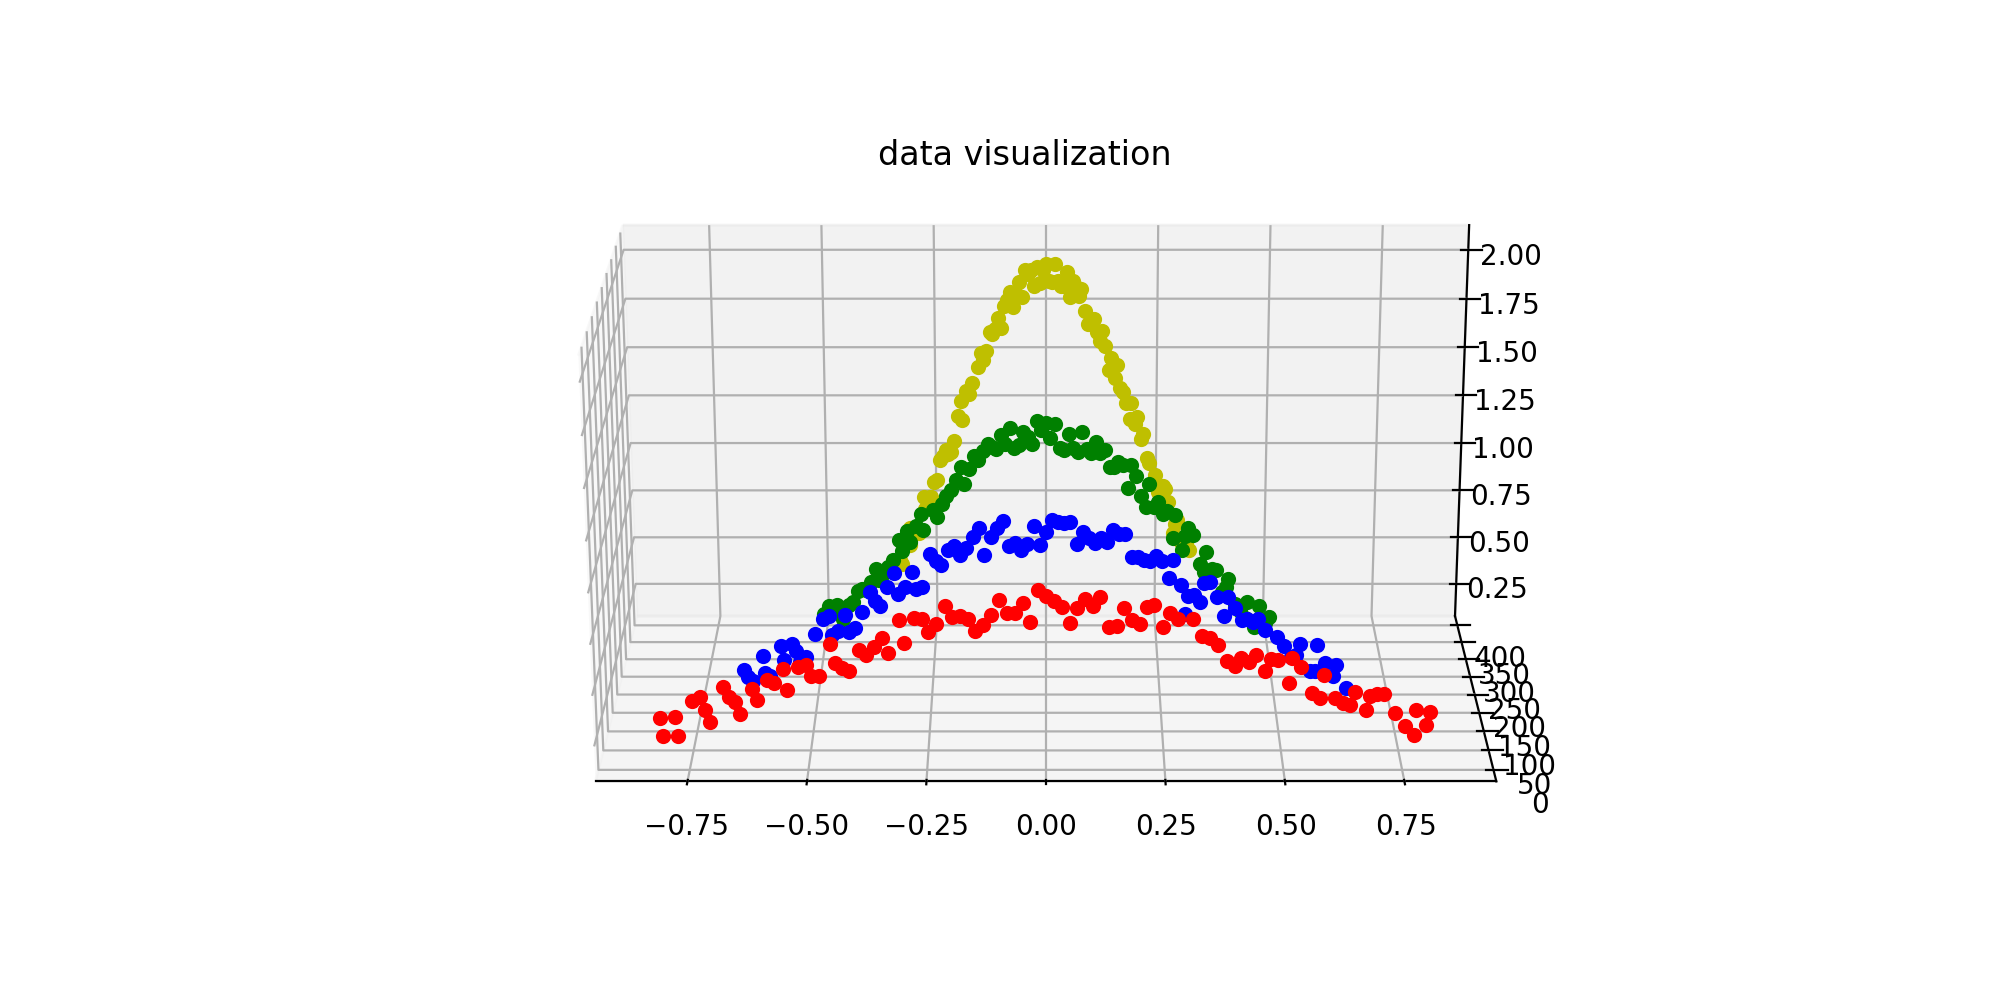

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("data visualization")
n = X.shape[0]
counter = 0
colors = ['r', 'b', 'g', 'y']
n_colors = len(colors)
for a, b, c in zip(X, y, range(n-1)):
    ax.scatter(a, c, b, c=colors[int(counter/100)%n_colors], marker='o')
    counter += 1

ax.view_init(20, 270)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

def get_new_model(X, y, base_model=SVR):
    new_model = base_model()
    new_model.fit(X, y.ravel())
    return new_model

def scorer(pred, label):
    return np.sum((pred - label) ** 2)

def get_detectors_prediction(model, sample, label, detectors, scorer=scorer):
    sol = []
    pred = model.predict([sample])
    error = scorer(pred, label)
    for d in detectors:
        sol.append(d.predict(sample, error))
        
    return sol


# X_train, y_train = X[:50, :], y[:50]

# model = LinearRegression()
# model = model.fit(X_train, y_train)

In [8]:
# creates set of detectors
win_lens = [10*(i+1) for i in range(10)]
wrn_bds = [2, 3]
dtc_bds = [3, 4]
detectors_set = []
for win_len in win_lens:
    for wrn_bd in wrn_bds:
        for dtc_bd in dtc_bds:
            new_detector = WinRDDM(win_len=win_len ,wrn_bd=wrn_bd, dtc_bd=dtc_bd)
            detectors_set.append(new_detector)

In [15]:
drift_number = 4
concept_len = 100
detectors_outputs = []
curr_model = None

for i in range(drift_number):
    start_idx, end_idx = concept_len * i, concept_len * (i+1) + 1
    X_train, y_train = X[start_idx: start_idx + 51], y_noised[start_idx: start_idx + 51]
    
    curr_model = get_new_model(X_train, y_train)
    for j in range(int(1.2*concept_len)):
        curr_idx = i * concept_len + j
        if curr_idx >= X.shape[0]:
            curr_idx = j - concept_len
        next_sample, next_label = X[curr_idx], y[curr_idx]
        detectors_prediction = get_detectors_prediction(model=curr_model, 
                                                        sample=next_sample, 
                                                        label=next_label, 
                                                        detectors=detectors_set)
        detectors_outputs.append(detectors_prediction)


 avg :  0.10427855145308962  std :  0.105494481305
min avg :  0.08148218640542951  min std :  0.0810155599227
 avg :  0.10427855145308962  std :  0.105494481305
min avg :  0.08148218640542951  min std :  0.0810155599227
 avg :  0.10427855145308962  std :  0.105494481305
min avg :  0.08148218640542951  min std :  0.0810155599227
 avg :  0.10427855145308962  std :  0.105494481305
min avg :  0.08148218640542951  min std :  0.0810155599227
 avg :  0.13963780357470154  std :  0.123538323693
min avg :  0.0981340018411301  min std :  0.10400346822
 avg :  0.13963780357470154  std :  0.123538323693
min avg :  0.0981340018411301  min std :  0.10400346822
 avg :  0.13963780357470154  std :  0.123538323693
min avg :  0.0981340018411301  min std :  0.10400346822
 avg :  0.13963780357470154  std :  0.123538323693
min avg :  0.0981340018411301  min std :  0.10400346822
 avg :  0.15821810259401506  std :  0.127966712273
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.1582181025940

min avg :  0.139676274466562  min std :  0.139384873009
 avg :  0.13866672179673806  std :  0.140097946205
min avg :  0.139676274466562  min std :  0.139384873009
 avg :  0.13866672179673806  std :  0.140097946205
min avg :  0.139676274466562  min std :  0.139384873009
 avg :  0.13866672179673806  std :  0.140097946205
min avg :  0.139676274466562  min std :  0.139384873009
 avg :  0.14082746047659828  std :  0.136670048206
min avg :  0.14082933828936114  min std :  0.136668115593
 avg :  0.14082746047659828  std :  0.136670048206
min avg :  0.14082933828936114  min std :  0.136668115593
 avg :  0.14082746047659828  std :  0.136670048206
min avg :  0.14082933828936114  min std :  0.136668115593
 avg :  0.14082746047659828  std :  0.136670048206
min avg :  0.14082933828936114  min std :  0.136668115593
 avg :  0.14512182107140414  std :  0.135779585588
min avg :  0.14512210090460667  min std :  0.135779286708
 avg :  0.14512182107140414  std :  0.135779585588
min avg :  0.14512210090460

min avg :  0.12566915948091892  min std :  0.138226990647
 avg :  0.1247299874147307  std :  0.13878435508
min avg :  0.12566915948091892  min std :  0.138226990647
 avg :  0.1247299874147307  std :  0.13878435508
min avg :  0.12566915948091892  min std :  0.138226990647
 avg :  0.12713466663863382  std :  0.138207868649
min avg :  0.1270895069869413  min std :  0.138248285076
 avg :  0.12713466663863382  std :  0.138207868649
min avg :  0.1270895069869413  min std :  0.138248285076
 avg :  0.12713466663863382  std :  0.138207868649
min avg :  0.1270895069869413  min std :  0.138248285076
 avg :  0.12713466663863382  std :  0.138207868649
min avg :  0.1270895069869413  min std :  0.138248285076
 avg :  0.12990292653670468  std :  0.136480016504
min avg :  0.13224976204872083  min std :  0.136337220366
 avg :  0.12990292653670468  std :  0.136480016504
min avg :  0.13224976204872083  min std :  0.136337220366
 avg :  0.12990292653670468  std :  0.136480016504
min avg :  0.13224976204872

 avg :  0.08656521480435593  std :  0.122703081303
min avg :  0.09180891862942822  min std :  0.124660865797
 avg :  0.1039802700632635  std :  0.132740315924
min avg :  0.10592113628059656  min std :  0.132118138024
 avg :  0.1039802700632635  std :  0.132740315924
min avg :  0.10592113628059656  min std :  0.132118138024
 avg :  0.1039802700632635  std :  0.132740315924
min avg :  0.10592113628059656  min std :  0.132118138024
 avg :  0.1039802700632635  std :  0.132740315924
min avg :  0.10592113628059656  min std :  0.132118138024
 avg :  0.10916509914738899  std :  0.138099422227
min avg :  0.11185337792117925  min std :  0.137862758517
 avg :  0.10916509914738899  std :  0.138099422227
min avg :  0.11185337792117925  min std :  0.137862758517
 avg :  0.10916509914738899  std :  0.138099422227
min avg :  0.11185337792117925  min std :  0.137862758517
 avg :  0.10916509914738899  std :  0.138099422227
min avg :  0.11185337792117925  min std :  0.137862758517
 avg :  0.1177005517559

min avg :  0.10752304520334457  min std :  0.138126031983
 avg :  0.10741117791424798  std :  0.138208965359
min avg :  0.10752304520334457  min std :  0.138126031983
 avg :  0.10741117791424798  std :  0.138208965359
min avg :  0.10752304520334457  min std :  0.138126031983
 avg :  0.10741117791424798  std :  0.138208965359
min avg :  0.10752304520334457  min std :  0.138126031983
 avg :  0.10678929861453107  std :  0.137248611956
min avg :  0.10712608250833287  min std :  0.13702730333
 avg :  0.10678929861453107  std :  0.137248611956
min avg :  0.10712608250833287  min std :  0.13702730333
 avg :  0.10678929861453107  std :  0.137248611956
min avg :  0.10712608250833287  min std :  0.13702730333
 avg :  0.10678929861453107  std :  0.137248611956
min avg :  0.10712608250833287  min std :  0.13702730333
 avg :  0.0022872484702797864  std :  0.00145628449138
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.0022872484702797864  std :  0.00145628449138
min avg :  

min avg :  0.05417503479000637  min std :  0.102970714611
 avg :  0.04849176394596939  std :  0.0961572881913
min avg :  0.05417503479000637  min std :  0.102970714611
 avg :  0.071757585799499  std :  0.11420185567
min avg :  0.07452028253737104  min std :  0.114775050714
 avg :  0.071757585799499  std :  0.11420185567
min avg :  0.07452028253737104  min std :  0.114775050714
 avg :  0.071757585799499  std :  0.11420185567
min avg :  0.07452028253737104  min std :  0.114775050714
 avg :  0.071757585799499  std :  0.11420185567
min avg :  0.07452028253737104  min std :  0.114775050714
 avg :  0.08702952453796405  std :  0.133390409859
min avg :  0.08770137091046623  min std :  0.133086384299
 avg :  0.08702952453796405  std :  0.133390409859
min avg :  0.08770137091046623  min std :  0.133086384299
 avg :  0.08702952453796405  std :  0.133390409859
min avg :  0.08770137091046623  min std :  0.133086384299
 avg :  0.08702952453796405  std :  0.133390409859
min avg :  0.08770137091046623

min avg :  0.06917089466410507  min std :  0.112662521809
 avg :  0.06908229389991458  std :  0.112713529527
min avg :  0.06917089466410507  min std :  0.112662521809
 avg :  0.07833955805999912  std :  0.128252034682
min avg :  0.0817421683950006  min std :  0.130194865955
 avg :  0.07833955805999912  std :  0.128252034682
min avg :  0.0817421683950006  min std :  0.130194865955
 avg :  0.07833955805999912  std :  0.128252034682
min avg :  0.0817421683950006  min std :  0.130194865955
 avg :  0.07833955805999912  std :  0.128252034682
min avg :  0.0817421683950006  min std :  0.130194865955
 avg :  0.08940449813289356  std :  0.135564862538
min avg :  0.09015135357041622  min std :  0.135279585129
 avg :  0.08940449813289356  std :  0.135564862538
min avg :  0.09015135357041622  min std :  0.135279585129
 avg :  0.08940449813289356  std :  0.135564862538
min avg :  0.09015135357041622  min std :  0.135279585129
 avg :  0.08940449813289356  std :  0.135564862538
min avg :  0.0901513535

min avg :  0.047507017699884434  min std :  0.0975506126777
 avg :  0.04736567564377187  std :  0.0976089805221
min avg :  0.047507017699884434  min std :  0.0975506126777
 avg :  0.04736567564377187  std :  0.0976089805221
min avg :  0.047507017699884434  min std :  0.0975506126777
 avg :  0.061799562696114384  std :  0.108247964937
min avg :  0.06763433087684871  min std :  0.1185063727
 avg :  0.061799562696114384  std :  0.108247964937
min avg :  0.06763433087684871  min std :  0.1185063727
 avg :  0.061799562696114384  std :  0.108247964937
min avg :  0.06763433087684871  min std :  0.1185063727
 avg :  0.061799562696114384  std :  0.108247964937
min avg :  0.06763433087684871  min std :  0.1185063727
 avg :  0.07385084225071943  std :  0.125763475133
min avg :  0.07415619350215909  min std :  0.125624398028
 avg :  0.07385084225071943  std :  0.125763475133
min avg :  0.07415619350215909  min std :  0.125624398028
 avg :  0.07385084225071943  std :  0.125763475133
min avg :  0.07

 avg :  0.002448902479098185  std :  0.0019973991247
min avg :  0.0015034482692206105  min std :  0.00134458477479
Warning  5
 avg :  0.002448902479098185  std :  0.0019973991247
min avg :  0.0015034482692206105  min std :  0.00134458477479
Warning  5
 avg :  0.002448902479098185  std :  0.0019973991247
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.002448902479098185  std :  0.0019973991247
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.002564594155056014  std :  0.0020285808755
min avg :  0.001715300814293805  min std :  0.00138104507313
Warning  5
 avg :  0.002564594155056014  std :  0.0020285808755
min avg :  0.001715300814293805  min std :  0.00138104507313
Warning  5
 avg :  0.002564594155056014  std :  0.0020285808755
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.002564594155056014  std :  0.0020285808755
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.0027260137405479396  std :  0.

min avg :  0.04449042548633035  min std :  0.0964375440424
 avg :  0.0445034214548133  std :  0.0964318834638
min avg :  0.04449042548633035  min std :  0.0964375440424
 avg :  0.0020128299347039478  std :  0.00162385734676
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.0020128299347039478  std :  0.00162385734676
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.0020128299347039478  std :  0.00162385734676
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.0020128299347039478  std :  0.00162385734676
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.002191430451316954  std :  0.00187051862364
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.002191430451316954  std :  0.00187051862364
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.002191430451316954  std :  0.00187051862364
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.00219143

min avg :  0.013574014659034246  min std :  0.0475438351819
 avg :  0.010409976909303422  std :  0.037669449047
min avg :  0.013574014659034246  min std :  0.0475438351819
 avg :  0.02501270046376526  std :  0.0662972215913
min avg :  0.025654203341449442  min std :  0.0663873380156
 avg :  0.02501270046376526  std :  0.0662972215913
min avg :  0.025654203341449442  min std :  0.0663873380156
 avg :  0.02501270046376526  std :  0.0662972215913
min avg :  0.025654203341449442  min std :  0.0663873380156
 avg :  0.02501270046376526  std :  0.0662972215913
min avg :  0.025654203341449442  min std :  0.0663873380156
 avg :  0.003148920890311435  std :  0.00181915647687
min avg :  0.0015034482692206105  min std :  0.00134458477479
Warning  8
 avg :  0.003148920890311435  std :  0.00181915647687
min avg :  0.0015034482692206105  min std :  0.00134458477479
Warning  8
 avg :  0.003148920890311435  std :  0.00181915647687
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.

min avg :  0.002508474197348912  min std :  0.00186564347643
 avg :  0.002534611700215983  std :  0.00184520365797
min avg :  0.002508474197348912  min std :  0.00186564347643
 avg :  0.002587058243561715  std :  0.0018693104136
min avg :  0.002569157071352281  min std :  0.00188141003801
 avg :  0.002587058243561715  std :  0.0018693104136
min avg :  0.002569157071352281  min std :  0.00188141003801
 avg :  0.002587058243561715  std :  0.0018693104136
min avg :  0.002569157071352281  min std :  0.00188141003801
 avg :  0.002587058243561715  std :  0.0018693104136
min avg :  0.002569157071352281  min std :  0.00188141003801
 avg :  0.012756207564514503  std :  0.0452411077348
min avg :  0.01273526677759999  min std :  0.0452465122131
 avg :  0.012756207564514503  std :  0.0452411077348
min avg :  0.01273526677759999  min std :  0.0452465122131
 avg :  0.012756207564514503  std :  0.0452411077348
min avg :  0.01273526677759999  min std :  0.0452465122131
 avg :  0.012756207564514503  st

 avg :  0.002397993499741138  std :  0.00171635217882
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.002397993499741138  std :  0.00171635217882
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.002397993499741138  std :  0.00171635217882
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.002397993499741138  std :  0.00171635217882
min avg :  0.0015034482692206105  min std :  0.00134458477479
 avg :  0.002621576842985831  std :  0.00166465483882
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.002621576842985831  std :  0.00166465483882
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.002621576842985831  std :  0.00166465483882
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.002621576842985831  std :  0.00166465483882
min avg :  0.001715300814293805  min std :  0.00138104507313
 avg :  0.002652325375615548  std :  0.00169915372988
min avg :  0.002146586

min avg :  0.003280095068491427  min std :  0.0034166748552
 avg :  0.005001276173944565  std :  0.00347618085451
min avg :  0.003280095068491427  min std :  0.0034166748552
 avg :  0.005001276173944565  std :  0.00347618085451
min avg :  0.003280095068491427  min std :  0.0034166748552
 avg :  0.005001276173944565  std :  0.00347618085451
min avg :  0.003280095068491427  min std :  0.0034166748552
 avg :  0.004340503923990933  std :  0.00367439429194
min avg :  0.004695693179464571  min std :  0.00358231083645
 avg :  0.004340503923990933  std :  0.00367439429194
min avg :  0.004695693179464571  min std :  0.00358231083645
 avg :  0.004340503923990933  std :  0.00367439429194
min avg :  0.004695693179464571  min std :  0.00358231083645
 avg :  0.004340503923990933  std :  0.00367439429194
min avg :  0.004695693179464571  min std :  0.00358231083645
 avg :  0.011671888731420261  std :  0.0196063441118
min avg :  0.014009525564487795  min std :  0.0226098486027
 avg :  0.011671888731420

 avg :  0.003952477012509855  std :  0.00340256765082
min avg :  0.004103535820447498  min std :  0.00359271251973
 avg :  0.003952477012509855  std :  0.00340256765082
min avg :  0.004103535820447498  min std :  0.00359271251973
 avg :  0.003952477012509855  std :  0.00340256765082
min avg :  0.004103535820447498  min std :  0.00359271251973
 avg :  0.003952477012509855  std :  0.00340256765082
min avg :  0.004103535820447498  min std :  0.00359271251973
 avg :  0.009788736690163903  std :  0.0183639345963
min avg :  0.00970777226600916  min std :  0.0183919664328
 avg :  0.009788736690163903  std :  0.0183639345963
min avg :  0.00970777226600916  min std :  0.0183919664328
 avg :  0.009788736690163903  std :  0.0183639345963
min avg :  0.00970777226600916  min std :  0.0183919664328
 avg :  0.009788736690163903  std :  0.0183639345963
min avg :  0.00970777226600916  min std :  0.0183919664328
 avg :  0.0035252296403611694  std :  0.00212467973599
min avg :  0.002646820146540519  min 

min avg :  0.0066328808739357405  min std :  0.0128092225608
 avg :  0.00639471509451016  std :  0.0127346125059
min avg :  0.0066328808739357405  min std :  0.0128092225608
 avg :  0.00639471509451016  std :  0.0127346125059
min avg :  0.0066328808739357405  min std :  0.0128092225608
 avg :  0.00639471509451016  std :  0.0127346125059
min avg :  0.0066328808739357405  min std :  0.0128092225608
 avg :  0.008549096896042425  std :  0.0158821650735
min avg :  0.00848384467157406  min std :  0.0159061160838
 avg :  0.008549096896042425  std :  0.0158821650735
min avg :  0.00848384467157406  min std :  0.0159061160838
 avg :  0.008549096896042425  std :  0.0158821650735
min avg :  0.00848384467157406  min std :  0.0159061160838
 avg :  0.008549096896042425  std :  0.0158821650735
min avg :  0.00848384467157406  min std :  0.0159061160838
 avg :  0.004233049462735096  std :  0.00267531048867
min avg :  0.002646820146540519  min std :  0.00355770933653
 avg :  0.004233049462735096  std :  

 avg :  0.003879988293548789  std :  0.00294069790945
min avg :  0.003083679379875799  min std :  0.00201688837432
 avg :  0.0037884826263662507  std :  0.00265181336424
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.0037884826263662507  std :  0.00265181336424
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.0037884826263662507  std :  0.00265181336424
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.0037884826263662507  std :  0.00265181336424
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.003660994660186124  std :  0.00259418328488
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.003660994660186124  std :  0.00259418328488
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.003660994660186124  std :  0.00259418328488
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.003660994660186124  std :  0.00259418328488
min avg :  0.003657226

min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.0039040685339912585  std :  0.00266068309357
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.0037789609795221557  std :  0.00261754630251
min avg :  0.0036592654122115805  min std :  0.00263683469427
 avg :  0.0037789609795221557  std :  0.00261754630251
min avg :  0.0036592654122115805  min std :  0.00263683469427
 avg :  0.0037789609795221557  std :  0.00261754630251
min avg :  0.0036592654122115805  min std :  0.00263683469427
 avg :  0.0037789609795221557  std :  0.00261754630251
min avg :  0.0036592654122115805  min std :  0.00263683469427
 avg :  0.003892089762002492  std :  0.00288788829506
min avg :  0.003916322464759036  min std :  0.00301263064012
 avg :  0.003892089762002492  std :  0.00288788829506
min avg :  0.003916322464759036  min std :  0.00301263064012
 avg :  0.003892089762002492  std :  0.00288788829506
min avg :  0.003916322464759036  min std :  0.00301263064012
 avg :  0.

 avg :  0.004274809059196339  std :  0.00322767468792
min avg :  0.004025834753251334  min std :  0.00312486858264
 avg :  0.005844696966523365  std :  0.0106078927278
min avg :  0.0059017755182403835  min std :  0.0106642475852
 avg :  0.005844696966523365  std :  0.0106078927278
min avg :  0.0059017755182403835  min std :  0.0106642475852
 avg :  0.005844696966523365  std :  0.0106078927278
min avg :  0.0059017755182403835  min std :  0.0106642475852
 avg :  0.005844696966523365  std :  0.0106078927278
min avg :  0.0059017755182403835  min std :  0.0106642475852
 avg :  0.007407766040394629  std :  0.0135291389782
min avg :  0.007240191689817857  min std :  0.0135489074669
 avg :  0.007407766040394629  std :  0.0135291389782
min avg :  0.007240191689817857  min std :  0.0135489074669
 avg :  0.007407766040394629  std :  0.0135291389782
min avg :  0.007240191689817857  min std :  0.0135489074669
 avg :  0.007407766040394629  std :  0.0135291389782
min avg :  0.007240191689817857  min 

 avg :  0.0046779360306762625  std :  0.00338292531639
min avg :  0.003083679379875799  min std :  0.00201688837432
 avg :  0.0046779360306762625  std :  0.00338292531639
min avg :  0.003083679379875799  min std :  0.00201688837432
 avg :  0.004188749604677526  std :  0.00333182791087
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.004188749604677526  std :  0.00333182791087
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.004188749604677526  std :  0.00333182791087
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.004188749604677526  std :  0.00333182791087
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.004237826633137408  std :  0.00318325761749
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.004237826633137408  std :  0.00318325761749
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.004237826633137408  std :  0.00318325761749
min avg :  0.00365722641

 avg :  0.004453588807631532  std :  0.00316100457363
min avg :  0.003330239763571478  min std :  0.00278110932275
 avg :  0.004100091462849664  std :  0.00318134380831
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.004100091462849664  std :  0.00318134380831
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.004100091462849664  std :  0.00318134380831
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.004100091462849664  std :  0.00318134380831
min avg :  0.003657226410040399  min std :  0.00259879061298
 avg :  0.004284149833920237  std :  0.00304806448285
min avg :  0.0036592654122115805  min std :  0.00263683469427
 avg :  0.004284149833920237  std :  0.00304806448285
min avg :  0.0036592654122115805  min std :  0.00263683469427
 avg :  0.004284149833920237  std :  0.00304806448285
min avg :  0.0036592654122115805  min std :  0.00263683469427
 avg :  0.004284149833920237  std :  0.00304806448285
min avg :  0.0036592654

 avg :  0.009353983665868726  std :  0.00630840661781
min avg :  0.00800979822259095  min std :  0.00624999502381
 avg :  0.009353983665868726  std :  0.00630840661781
min avg :  0.00800979822259095  min std :  0.00624999502381
 avg :  0.02034251806488462  std :  0.0401720926551
min avg :  0.02024855214844972  min std :  0.040176892533
 avg :  0.02034251806488462  std :  0.0401720926551
min avg :  0.02024855214844972  min std :  0.040176892533
 avg :  0.02034251806488462  std :  0.0401720926551
min avg :  0.02024855214844972  min std :  0.040176892533
 avg :  0.02034251806488462  std :  0.0401720926551
min avg :  0.02024855214844972  min std :  0.040176892533
 avg :  0.010850519339546784  std :  0.00515454483422
min avg :  0.0065706227027815724  min std :  0.00714075545289
 avg :  0.010850519339546784  std :  0.00515454483422
min avg :  0.0065706227027815724  min std :  0.00714075545289
 avg :  0.010850519339546784  std :  0.00515454483422
min avg :  0.0065706227027815724  min std :  0

min avg :  0.0065706227027815724  min std :  0.00714075545289
 avg :  0.008865272977874181  std :  0.00613594612202
min avg :  0.00800979822259095  min std :  0.00624999502381
 avg :  0.008865272977874181  std :  0.00613594612202
min avg :  0.00800979822259095  min std :  0.00624999502381
 avg :  0.008865272977874181  std :  0.00613594612202
min avg :  0.00800979822259095  min std :  0.00624999502381
 avg :  0.008865272977874181  std :  0.00613594612202
min avg :  0.00800979822259095  min std :  0.00624999502381
 avg :  0.009321749885143294  std :  0.00558415160256
min avg :  0.008097244276362252  min std :  0.00606189850086
 avg :  0.009321749885143294  std :  0.00558415160256
min avg :  0.008097244276362252  min std :  0.00606189850086
 avg :  0.009321749885143294  std :  0.00558415160256
min avg :  0.008097244276362252  min std :  0.00606189850086
 avg :  0.009321749885143294  std :  0.00558415160256
min avg :  0.008097244276362252  min std :  0.00606189850086
 avg :  0.008659810326

min avg :  0.005883033535235975  min std :  0.00638067660045
 avg :  0.008624652569460932  std :  0.00590665971591
min avg :  0.007816151365948817  min std :  0.00612067600177
 avg :  0.008624652569460932  std :  0.00590665971591
min avg :  0.007816151365948817  min std :  0.00612067600177
 avg :  0.008624652569460932  std :  0.00590665971591
min avg :  0.007816151365948817  min std :  0.00612067600177
 avg :  0.008624652569460932  std :  0.00590665971591
min avg :  0.007816151365948817  min std :  0.00612067600177
 avg :  0.00822446733107706  std :  0.00568040693422
min avg :  0.007953334620988137  min std :  0.00586398533827
 avg :  0.00822446733107706  std :  0.00568040693422
min avg :  0.007953334620988137  min std :  0.00586398533827
 avg :  0.00822446733107706  std :  0.00568040693422
min avg :  0.007953334620988137  min std :  0.00586398533827
 avg :  0.00822446733107706  std :  0.00568040693422
min avg :  0.007953334620988137  min std :  0.00586398533827
 avg :  0.0087421261566

min avg :  0.005883033535235975  min std :  0.00638067660045
 avg :  0.00920347981218585  std :  0.00689246248794
min avg :  0.005883033535235975  min std :  0.00638067660045
 avg :  0.00920347981218585  std :  0.00689246248794
min avg :  0.005883033535235975  min std :  0.00638067660045
 avg :  0.008813421891712296  std :  0.00577082709148
min avg :  0.007391831335311234  min std :  0.00535869006425
 avg :  0.008813421891712296  std :  0.00577082709148
min avg :  0.007391831335311234  min std :  0.00535869006425
 avg :  0.008813421891712296  std :  0.00577082709148
min avg :  0.007391831335311234  min std :  0.00535869006425
 avg :  0.008813421891712296  std :  0.00577082709148
min avg :  0.007391831335311234  min std :  0.00535869006425
 avg :  0.008874065011127091  std :  0.00623133394113
min avg :  0.007953334620988137  min std :  0.00586398533827
 avg :  0.008874065011127091  std :  0.00623133394113
min avg :  0.007953334620988137  min std :  0.00586398533827
 avg :  0.00887406501

 avg :  0.007519044590678124  std :  0.00585538715699
min avg :  0.007391831335311234  min std :  0.00535869006425
 avg :  0.007519044590678124  std :  0.00585538715699
min avg :  0.007391831335311234  min std :  0.00535869006425
 avg :  0.007519044590678124  std :  0.00585538715699
min avg :  0.007391831335311234  min std :  0.00535869006425
 avg :  0.007910728974839137  std :  0.00530918321
min avg :  0.007768889549010955  min std :  0.00545113901432
 avg :  0.007910728974839137  std :  0.00530918321
min avg :  0.007768889549010955  min std :  0.00545113901432
 avg :  0.007910728974839137  std :  0.00530918321
min avg :  0.007768889549010955  min std :  0.00545113901432
 avg :  0.007910728974839137  std :  0.00530918321
min avg :  0.007768889549010955  min std :  0.00545113901432
 avg :  0.00767974660083767  std :  0.00560147585255
min avg :  0.008075504974247385  min std :  0.00591892130753
 avg :  0.00767974660083767  std :  0.00560147585255
min avg :  0.008075504974247385  min std

 avg :  0.008464960428053279  std :  0.0058772048821
min avg :  0.007938756328946955  min std :  0.00556133394796
 avg :  0.008464960428053279  std :  0.0058772048821
min avg :  0.007938756328946955  min std :  0.00556133394796
 avg :  0.008464960428053279  std :  0.0058772048821
min avg :  0.007938756328946955  min std :  0.00556133394796
 avg :  0.008633963378919854  std :  0.00591676069596
min avg :  0.008133901333831621  min std :  0.00579005652548
 avg :  0.008633963378919854  std :  0.00591676069596
min avg :  0.008133901333831621  min std :  0.00579005652548
 avg :  0.008633963378919854  std :  0.00591676069596
min avg :  0.008133901333831621  min std :  0.00579005652548
 avg :  0.008633963378919854  std :  0.00591676069596
min avg :  0.008133901333831621  min std :  0.00579005652548
 avg :  0.00840040094999658  std :  0.00585881737776
min avg :  0.008175447712308274  min std :  0.00584272834013
 avg :  0.00840040094999658  std :  0.00585881737776
min avg :  0.008175447712308274

min avg :  0.008133901333831621  min std :  0.00579005652548
 avg :  0.008310083462072014  std :  0.00579929143688
min avg :  0.008133901333831621  min std :  0.00579005652548
 avg :  0.00853398524614524  std :  0.00582299663029
min avg :  0.008175447712308274  min std :  0.00584272834013
 avg :  0.00853398524614524  std :  0.00582299663029
min avg :  0.008175447712308274  min std :  0.00584272834013
 avg :  0.00853398524614524  std :  0.00582299663029
min avg :  0.008175447712308274  min std :  0.00584272834013
 avg :  0.00853398524614524  std :  0.00582299663029
min avg :  0.008175447712308274  min std :  0.00584272834013
 avg :  0.008464305389824735  std :  0.00589809507159
min avg :  0.008395755237705315  min std :  0.0058960378412
 avg :  0.008464305389824735  std :  0.00589809507159
min avg :  0.008395755237705315  min std :  0.0058960378412
 avg :  0.008464305389824735  std :  0.00589809507159
min avg :  0.008395755237705315  min std :  0.0058960378412
 avg :  0.0084643053898247

min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.41531606188011433  std :  0.254140209434
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.41531606188011433  std :  0.254140209434
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.41531606188011433  std :  0.254140209434
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.41531606188011433  std :  0.254140209434
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.42065673608962334  std :  0.257731389973
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.42065673608962334  std :  0.257731389973
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.42065673608962334  std :  0.257731389973
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.42065673608962334  std :  0.257731389973
min avg :  0.2974503689900896  min std :  0.272237481477
 avg :  0.4226171408352795  std :  0.255036432046
min avg :  0.2974503689900896

 avg :  0.1527344786499472  std :  0.110232845415
min avg :  0.15295666946284917  min std :  0.114257848715
 avg :  0.1527344786499472  std :  0.110232845415
min avg :  0.15295666946284917  min std :  0.114257848715
 avg :  0.1527344786499472  std :  0.110232845415
min avg :  0.15295666946284917  min std :  0.114257848715
 avg :  0.15272955392876567  std :  0.116457075436
min avg :  0.1456235632379955  min std :  0.115877470755
 avg :  0.15272955392876567  std :  0.116457075436
min avg :  0.1456235632379955  min std :  0.115877470755
 avg :  0.15272955392876567  std :  0.116457075436
min avg :  0.1456235632379955  min std :  0.115877470755
 avg :  0.15272955392876567  std :  0.116457075436
min avg :  0.1456235632379955  min std :  0.115877470755
 avg :  0.20492339751232694  std :  0.191506976807
min avg :  0.2143818564509025  min std :  0.202138979844
 avg :  0.20492339751232694  std :  0.191506976807
min avg :  0.2143818564509025  min std :  0.202138979844
 avg :  0.20492339751232694 

min avg :  0.15058917314447706  min std :  0.151427550525
 avg :  0.15097374988118162  std :  0.15112719612
min avg :  0.15058917314447706  min std :  0.151427550525
 avg :  0.15097374988118162  std :  0.15112719612
min avg :  0.15058917314447706  min std :  0.151427550525
 avg :  0.19356714878488587  std :  0.195684357769
min avg :  0.1931093852072812  min std :  0.196069548191
 avg :  0.19356714878488587  std :  0.195684357769
min avg :  0.1931093852072812  min std :  0.196069548191
 avg :  0.19356714878488587  std :  0.195684357769
min avg :  0.1931093852072812  min std :  0.196069548191
 avg :  0.19356714878488587  std :  0.195684357769
min avg :  0.1931093852072812  min std :  0.196069548191
 avg :  0.08511024264433938  std :  0.0734093472869
min avg :  0.06409402535589095  min std :  0.0414429703777
Warning  4
 avg :  0.08511024264433938  std :  0.0734093472869
min avg :  0.06409402535589095  min std :  0.0414429703777
Warning  4
 avg :  0.08511024264433938  std :  0.073409347286

 avg :  0.12495609514408391  std :  0.132473442056
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.12495609514408391  std :  0.132473442056
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.12495609514408391  std :  0.132473442056
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.12495609514408391  std :  0.132473442056
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.12169191923055582  std :  0.12360826383
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.12169191923055582  std :  0.12360826383
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.12169191923055582  std :  0.12360826383
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.12169191923055582  std :  0.12360826383
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.13056864109103683  std :  0.1231225665
min avg :  0.12989146349643277  min std :  0.114716138882
 avg :  0.130568641091036

 avg :  0.16539495061481654  std :  0.155908657067
min avg :  0.10165110409247652  min std :  0.101067561458
Warning  4
 avg :  0.16539495061481654  std :  0.155908657067
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.16539495061481654  std :  0.155908657067
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.1400697193000852  std :  0.143471648709
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.1400697193000852  std :  0.143471648709
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.1400697193000852  std :  0.143471648709
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.1400697193000852  std :  0.143471648709
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.13935318329655855  std :  0.142453830875
min avg :  0.12989146349643277  min std :  0.114716138882
 avg :  0.13935318329655855  std :  0.142453830875
min avg :  0.12989146349643277  min std :  0.114716138882
 avg :  0.13

min avg :  0.12989146349643277  min std :  0.114716138882
 avg :  0.15626236187038525  std :  0.14884470034
min avg :  0.12989146349643277  min std :  0.114716138882
 avg :  0.15626236187038525  std :  0.14884470034
min avg :  0.12989146349643277  min std :  0.114716138882
 avg :  0.15626236187038525  std :  0.14884470034
min avg :  0.12989146349643277  min std :  0.114716138882
 avg :  0.14886853347364964  std :  0.141865135435
min avg :  0.13875184340353755  min std :  0.12549836341
 avg :  0.14886853347364964  std :  0.141865135435
min avg :  0.13875184340353755  min std :  0.12549836341
 avg :  0.14886853347364964  std :  0.141865135435
min avg :  0.13875184340353755  min std :  0.12549836341
 avg :  0.14886853347364964  std :  0.141865135435
min avg :  0.13875184340353755  min std :  0.12549836341
 avg :  0.15132667562497984  std :  0.138415513112
min avg :  0.14154913537311176  min std :  0.13825502204
 avg :  0.15132667562497984  std :  0.138415513112
min avg :  0.14154913537311

Warning  29
 avg :  0.1939505044385869  std :  0.122598450354
min avg :  0.0981340018411301  min std :  0.10400346822
 avg :  0.1939505044385869  std :  0.122598450354
min avg :  0.0981340018411301  min std :  0.10400346822
 avg :  0.1939447015281311  std :  0.15060912612
min avg :  0.10165110409247652  min std :  0.101067561458
Warning  22
 avg :  0.1939447015281311  std :  0.15060912612
min avg :  0.10165110409247652  min std :  0.101067561458
Warning  22
 avg :  0.1939447015281311  std :  0.15060912612
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.1939447015281311  std :  0.15060912612
min avg :  0.10165110409247652  min std :  0.101067561458
 avg :  0.19085167289349073  std :  0.153218065791
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.19085167289349073  std :  0.153218065791
min avg :  0.12163147481674978  min std :  0.123666398753
 avg :  0.19085167289349073  std :  0.153218065791
min avg :  0.12163147481674978  min std :  0.1236663987

min avg :  0.14154913537311176  min std :  0.13825502204
 avg :  0.1513935795824436  std :  0.141262731479
min avg :  0.14154913537311176  min std :  0.13825502204
 avg :  0.14691260882526716  std :  0.136336529822
min avg :  0.14970735260956  min std :  0.136751730464
 avg :  0.14691260882526716  std :  0.136336529822
min avg :  0.14970735260956  min std :  0.136751730464
 avg :  0.14691260882526716  std :  0.136336529822
min avg :  0.14970735260956  min std :  0.136751730464
 avg :  0.14691260882526716  std :  0.136336529822
min avg :  0.14970735260956  min std :  0.136751730464
 avg :  0.15174093288920038  std :  0.135728334768
min avg :  0.15402400114159565  min std :  0.134965351445
 avg :  0.15174093288920038  std :  0.135728334768
min avg :  0.15402400114159565  min std :  0.134965351445
 avg :  0.15174093288920038  std :  0.135728334768
min avg :  0.15402400114159565  min std :  0.134965351445
 avg :  0.15174093288920038  std :  0.135728334768
min avg :  0.15402400114159565  mi

 avg :  0.16440292723167105  std :  0.144872602853
min avg :  0.14154913537311176  min std :  0.13825502204
 avg :  0.15992127437018427  std :  0.143750396629
min avg :  0.14657378224815282  min std :  0.137557002293
 avg :  0.15992127437018427  std :  0.143750396629
min avg :  0.14657378224815282  min std :  0.137557002293
 avg :  0.15992127437018427  std :  0.143750396629
min avg :  0.14657378224815282  min std :  0.137557002293
 avg :  0.15992127437018427  std :  0.143750396629
min avg :  0.14657378224815282  min std :  0.137557002293
 avg :  0.15688343529038265  std :  0.139633605354
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.15688343529038265  std :  0.139633605354
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.15688343529038265  std :  0.139633605354
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.15688343529038265  std :  0.139633605354
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.15977097559666

 avg :  0.17234494274079842  std :  0.148919507003
min avg :  0.14657378224815282  min std :  0.137557002293
 avg :  0.17234494274079842  std :  0.148919507003
min avg :  0.14657378224815282  min std :  0.137557002293
 avg :  0.17234494274079842  std :  0.148919507003
min avg :  0.14657378224815282  min std :  0.137557002293
 avg :  0.16737756021432731  std :  0.147803584617
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.16737756021432731  std :  0.147803584617
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.16737756021432731  std :  0.147803584617
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.16737756021432731  std :  0.147803584617
min avg :  0.15024950639760812  min std :  0.13485767921
 avg :  0.16645114118444254  std :  0.144028826551
min avg :  0.14966257467910915  min std :  0.134178536028
 avg :  0.16645114118444254  std :  0.144028826551
min avg :  0.14966257467910915  min std :  0.134178536028
 avg :  0.1664511411844

In [16]:
out = np.array(detectors_outputs)

In [17]:
out.shape

(480, 40)

<IPython.core.display.Javascript object>


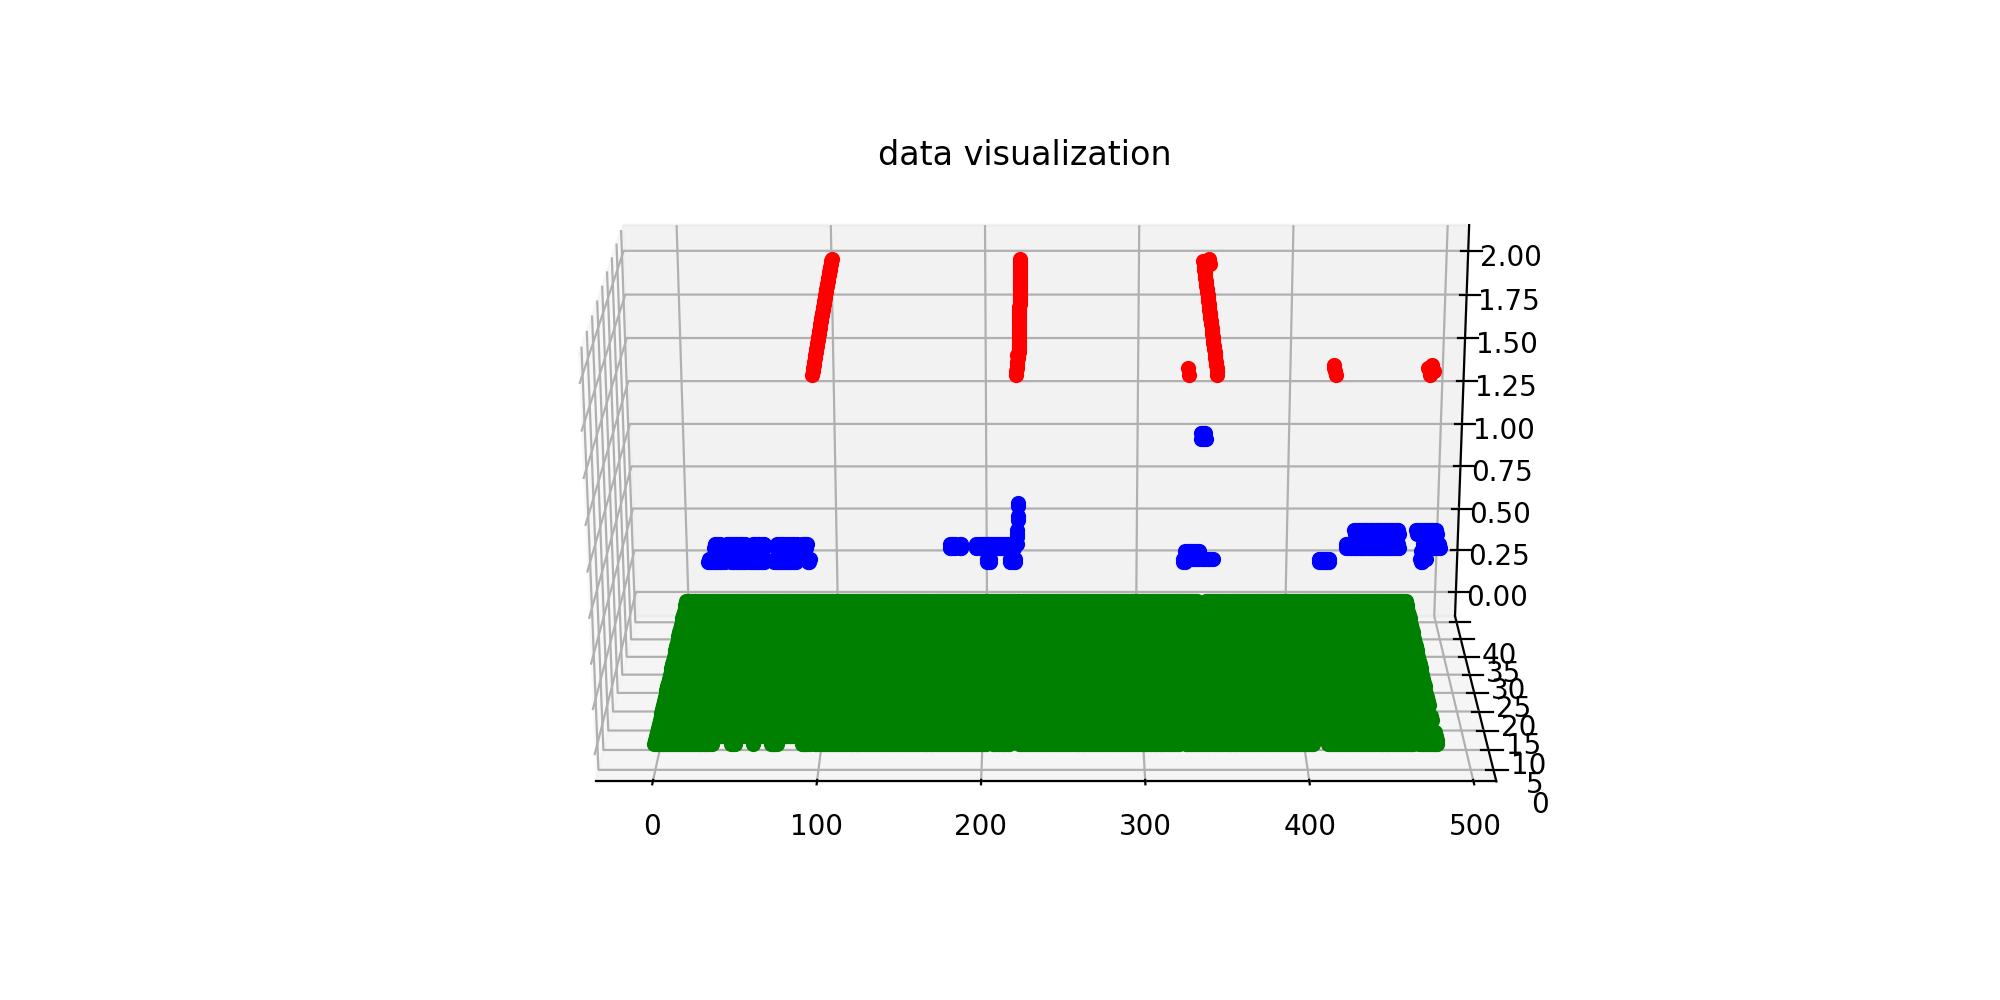

In [18]:
ax = range(out.shape[0])
ay = range(out.shape[1])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("data visualization")
colors = ['g', 'b', 'r']
for i in range(out.shape[0]):
    for dj in range(out.shape[1]):
        ax.scatter(i, dj, out[i, dj], c=colors[out[i, dj]], marker='o')

ax.view_init(20, 270)

In [25]:
out[101]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Detectors Set

In [7]:
win_lens = [10*(i+1) for i in range(10)]
wrn_bds = [2, 3]
dtc_bds = [3, 4]
detectors_set = []
for win_len in win_lens:
    for wrn_bd in wrn_bds:
        for dtc_bd in dtc_bds:
            new_detector = WinRDDM(win_len=win_len ,wrn_bd=wrn_bd, dtc_bd=dtc_bd)
            detectors_set.append(new_detector)
            


In [8]:
detectors_set